In [1]:
import pandas as pd
import numpy as np

In [5]:
races = pd.read_csv('/Formula1_2025Season_RaceResults.csv')
sprints = pd.read_csv('/Formula1_2025Season_SprintResults.csv')
drivers = ['Lando Norris', 'Max Verstappen', 'Oscar Piastri', 'George Russell']

In [ ]:
race_order = races.drop_duplicates('Track').reset_index(drop=True)
race_order['Order'] = range(len(race_order))
race_order = race_order[['Track', 'Order']]

races = races.merge(race_order, on='Track')
sprints = sprints.merge(race_order, on='Track', how='left')

results = pd.concat([races, sprints], ignore_index=True)

results = results.replace('NC', np.nan)
results = results.replace('DQ', np.nan)
results["Position"] = pd.to_numeric(results["Position"])

In [ ]:
results = results.sort_values(by = ["Order", "Position"])
results_reversed = results.sort_values(by = ["Order", "Position"], ascending = [False, True])
results_reversed["Points_Cum"] = results_reversed.groupby("Driver")["Points"].cumsum()

In [ ]:
import matplotlib.pyplot as plt

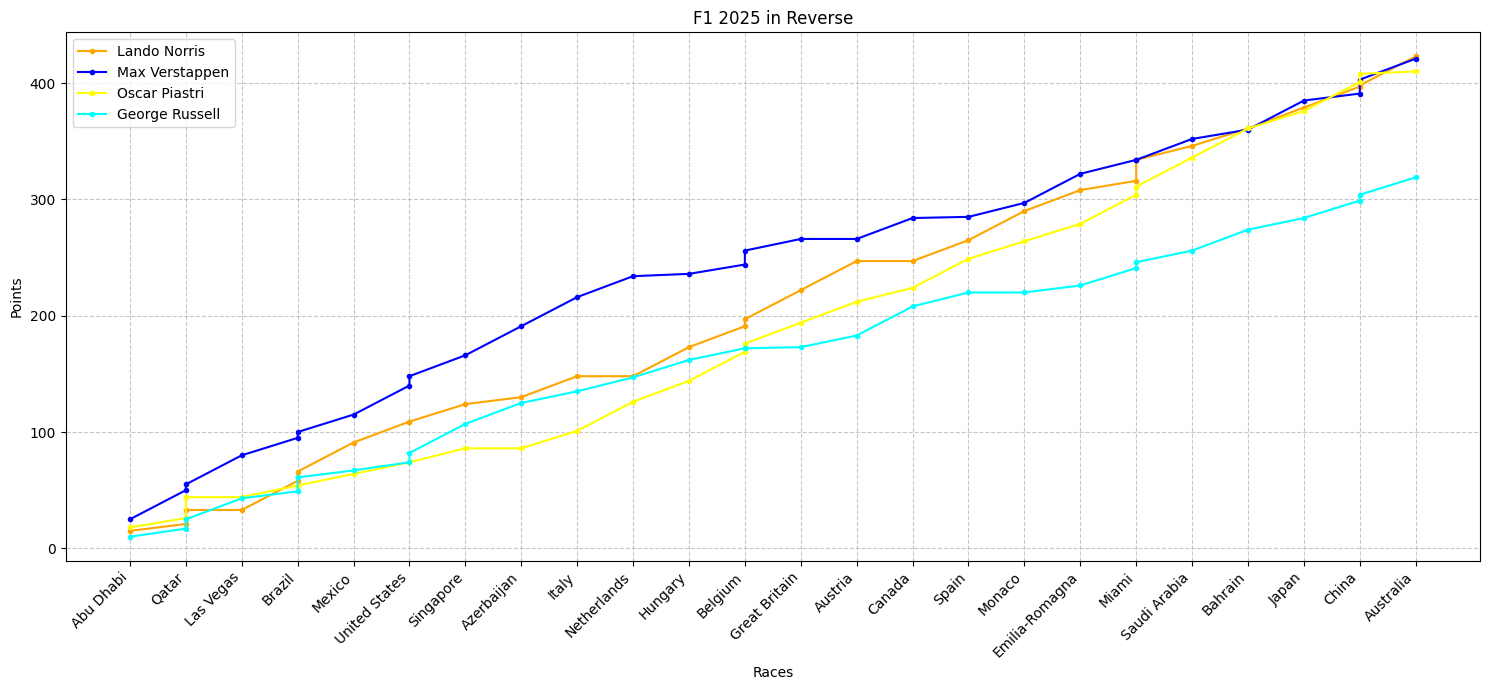

In [ ]:
cols = {'Lando Norris': 'orange', 'Oscar Piastri': 'yellow', 'Max Verstappen':'blue', 'George Russell':'cyan'}

plt.figure(figsize=(15, 7))

for i in drivers:
    curr = results_reversed[results_reversed['Driver'] == i]
    plt.plot(curr['Track'], curr['Points_Cum'], color = cols[i], label = i, marker = '.')
    plt.legend()
    plt.xlabel('Races')
    plt.ylabel('Points')
    plt.title('F1 2025 in Reverse')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

In [ ]:
unique_tracks_and_orders = results_reversed[['Track', 'Order']].drop_duplicates().sort_values(by='Order', ascending=False)

for idx, race_info in unique_tracks_and_orders.iterrows():
    current_track = race_info['Track']
    current_order = race_info['Order']

    # Get all entries for the current track
    current_track_data = results_reversed[results_reversed['Track'] == current_track]

    # Print individual race results
    print(f"\n--- {current_track} Race Results ---")
    for result_idx, result_row in .sort_values(by='Position')[:10].iterrows():
        position = int(result_row['Position']) if pd.notna(result_row['Position']) else 'DNF'
        driver = result_row['Driver']
        points = int(result_row['Points']) if pd.notna(result_row['Points']) else 0
        print(f"{position} {driver}")
    # For each driver, get their highest Points_Cum value at this track.
    # This value represents their total cumulative points from this race to the end of the season.
    driver_points_at_track = current_track_data.groupby('Driver')['Points_Cum'].max().reset_index()

    # Sort drivers by their cumulative points to determine standings
    champion_standings = driver_points_at_track.sort_values(by='Points_Cum', ascending=False).head(4)

    print(f"\nChampion Standings after {current_track}")

    for rank, (driver_idx, driver_row) in enumerate(champion_standings.iterrows()):
        print(f"  {rank + 1}. {driver_row['Driver']}: {int(driver_row['Points_Cum'])} points")


--- Abu Dhabi Race Results ---
1 Max Verstappen
2 Oscar Piastri
3 Lando Norris
4 Charles Leclerc
5 George Russell
6 Fernando Alonso
7 Esteban Ocon
8 Lewis Hamilton
9 Nico Hulkenberg
10 Lance Stroll

Champion Standings after Abu Dhabi
  1. Max Verstappen: 25 points
  2. Oscar Piastri: 18 points
  3. Lando Norris: 15 points
  4. Charles Leclerc: 12 points

--- Qatar Race Results ---
1 Max Verstappen
1 Oscar Piastri
2 Oscar Piastri
2 George Russell
3 Carlos Sainz
3 Lando Norris
4 Lando Norris
4 Max Verstappen
5 Kimi Antonelli
5 Yuki Tsunoda

Champion Standings after Qatar
  1. Max Verstappen: 55 points
  2. Oscar Piastri: 44 points
  3. Lando Norris: 33 points
  4. George Russell: 25 points

--- Las Vegas Race Results ---
1 Max Verstappen
2 George Russell
3 Kimi Antonelli
4 Charles Leclerc
5 Carlos Sainz
6 Isack Hadjar
7 Nico Hulkenberg
8 Lewis Hamilton
9 Esteban Ocon
10 Oliver Bearman

Champion Standings after Las Vegas
  1. Max Verstappen: 80 points
  2. Oscar Piastri: 44 points
  3. G